## Homework Assignment 9 - Version 2

**Question 1:** Select a short video with at least 3 animals and create a new movie from this video with a face tracker (each person’s face needs to be tracked by a rectangle of a different color) (50pt). See, for example, the video in: https://github.com/ageitgey/face_recognition

**Bonus:** Select a video with at least two people, and create a video with an people tracker (10pt).

# Importing Libraries



In [7]:
import cv2
import face_recognition
import numpy as np
from ultralytics import YOLO
import os

# Face Tracking Code

In [ ]:


# Load the video
video = cv2.VideoCapture('friends_video.mp4')  # Replace with your video path
output = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, 
                         (int(video.get(3)), int(video.get(4))))

# Process every nth frame to improve performance
FRAME_INTERVAL = 5  # Adjust this to skip frames for faster processing
frame_count = 0

while True:
    ret, frame = video.read()
    if not ret:
        break

    frame_count += 1
    if frame_count % FRAME_INTERVAL != 0:
        # Skip this frame to save computation
        continue

    # Convert frame to RGB (face_recognition expects RGB images)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect face locations and encodings
    face_locations = face_recognition.face_locations(rgb_frame, model='cnn')  # CNN-based detection
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    # Draw rectangles and display probabilities for each detected face
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]
    for i, (top, right, bottom, left) in enumerate(face_locations):
        # Calculate probabilities based on face distances (inverse relationship)
        distances = face_recognition.face_distance(face_encodings, face_encodings[i])  # Comparing face to itself
        probability = 1 - np.mean(distances)  # Approximation of confidence

        # Draw rectangle around the face
        cv2.rectangle(frame, (left, top), (right, bottom), colors[i % len(colors)], 2)

        # Put probability near the rectangle
        label = f"Confidence: {probability * 100:.2f}%"
        cv2.putText(frame, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[i % len(colors)], 2)

    # Write the frame to output video
    output.write(frame)

    # Display the frame (optional)
    cv2.imshow('Face Tracking', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
video.release()
output.release()
cv2.destroyAllWindows()


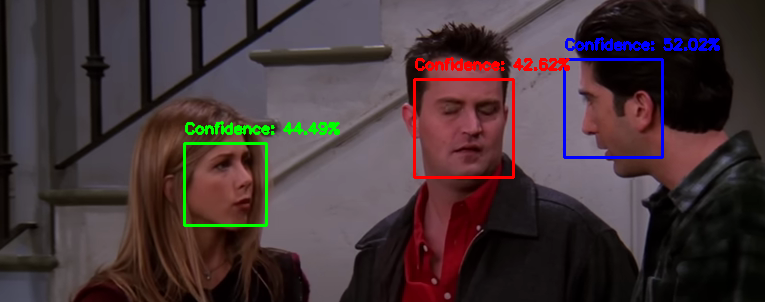

# People Tracking

In [8]:
# Load YOLOv8 model (pre-trained for general object detection)
model = YOLO('yolov8n.pt')  # Use yolov8m.pt or yolov8x.pt for higher accuracy

# Load the video
video_path = 'friends_video.mp4'  # Replace with your video path
video = cv2.VideoCapture(video_path)
output = cv2.VideoWriter('people_tracking.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, 
                         (int(video.get(3)), int(video.get(4))))

# Loop through video frames
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Perform inference with YOLOv8
    results = model.predict(source=frame, save=False, conf=0.5)  # Adjust `conf` for confidence threshold
    detections = results[0].boxes  # Get detected bounding boxes

    # Draw bounding boxes and confidence scores
    for box in detections:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        confidence = box.conf[0]  # Confidence score

        # Draw rectangle and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the frame to output video
    output.write(frame)

    # Display the frame (optional)
    cv2.imshow('YOLOv8 Face Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
video.release()
output.release()
cv2.destroyAllWindows()



0: 384x640 2 persons, 1 chair, 88.5ms
Speed: 10.5ms preprocess, 88.5ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 chair, 92.4ms
Speed: 1.7ms preprocess, 92.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 chair, 54.5ms
Speed: 1.5ms preprocess, 54.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 109.1ms
Speed: 26.2ms preprocess, 109.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 remote, 68.0ms
Speed: 1.9ms preprocess, 68.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 remote, 69.0ms
Speed: 7.2ms preprocess, 69.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



2025-01-09 21:41:15.096 Python[58227:8090194] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-09 21:41:15.096 Python[58227:8090194] +[IMKInputSession subclass]: chose IMKInputSession_Modern


0: 384x640 2 persons, 1 remote, 68.8ms
Speed: 1.5ms preprocess, 68.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 chair, 61.6ms
Speed: 1.3ms preprocess, 61.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 58.4ms
Speed: 1.7ms preprocess, 58.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 bottle, 69.5ms
Speed: 1.4ms preprocess, 69.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 62.5ms
Speed: 1.6ms preprocess, 62.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 60.2ms
Speed: 1.3ms preprocess, 60.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 149.4ms
Speed: 2.2ms preprocess, 149.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 56.0ms
Speed: 1.2ms preprocess, 56.0ms inference, 0.5ms po

**Question 2:** Create an image classifier that can identify if a person in the image wears a has a beard (25pt). Create an image classifier that can identify if a person in the image wears an earing (20pt). Evaluate the classifier accuracy (5pt)

**Bonus:** use fastai to improve the results (10pt)

# 3. Train the Classifier


In [14]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import torch
import torch.nn as nn



In [20]:
# Paths
data_dir = r"BigDataMining/Lecture9/Dataset/img_align_celeba"
labels_path = r"/Users/adirserruya/Projects/BigDataMining/Lecture9/Dataset/list_attr_celeba.csv"

# Load labels
df = pd.read_csv(labels_path)

In [46]:
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Beard,Earrings,labels
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,0,1,"[0, 1]"
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,1,0,0,"[0, 0]"
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,1,0,0,"[0, 0]"
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,0,1,"[0, 1]"
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,0,0,"[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,0,0,"[0, 0]"
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,0,0,"[0, 0]"
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,0,0,"[0, 0]"
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,1,1,-1,1,-1,-1,1,0,1,"[0, 1]"


In [47]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score

# # Dataset Preparation
# df['Beard'] = (df['No_Beard'] == -1).astype(int)  # 1 = Beard, 0 = No Beard
# df['Earrings'] = (df['Wearing_Earrings'] == 1).astype(int)  # 1 = Earrings, 0 = No Earrings

# # Combine labels into multi-hot vectors
# df['labels'] = df[['Beard', 'Earrings']].values.tolist()

# train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
from sklearn.utils import resample

# Combine Beard and Earrings into a single column for grouping
df['label_combination'] = df.apply(lambda row: f"{row['Beard']}_{row['Earrings']}", axis=1)

# Group by label combinations
groups = df.groupby('label_combination')

# Find the minimum number of samples in any group
min_samples = groups.size().min()

# Downsample each group to the same size
balanced_dfs = []
for _, group in groups:
    balanced_group = resample(group, replace=False, n_samples=min_samples, random_state=42)
    balanced_dfs.append(balanced_group)

# Combine balanced groups back into a single dataframe
balanced_df = pd.concat(balanced_dfs)

# Shuffle the balanced dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into train and validation sets
train_df, val_df = train_test_split(balanced_df, test_size=0.2, random_state=42)

# Print class distribution to verify balance
print("Class Distribution in Training Set:")
print(train_df['label_combination'].value_counts())
print("Class Distribution in Validation Set:")
print(val_df['label_combination'].value_counts())

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

class CelebADataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, data_dir, transform):
        self.dataframe = dataframe
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get the image filename from the `image_id` column
        img_name = os.path.join(self.data_dir, self.dataframe.iloc[idx]['image_id'])
        
        # Load the image
        image = Image.open(img_name).convert("RGB")
        
        # Get the multi-label vector
        labels = torch.tensor(self.dataframe.iloc[idx]['labels'], dtype=torch.float32)
        
        # Apply transformations
        if self.transform:
            image = self.transform(image)
        
        return image, labels

data_dir = r"/Users/adirserruya/Projects/BigDataMining/Lecture9/Dataset/img_align_celeba/img_align_celeba"
train_dataset = CelebADataset(train_df[:1000], data_dir, transform)
val_dataset = CelebADataset(val_df[:300], data_dir, transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model Setup
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Modify the final layer for multi-label classification (2 labels: Beard and Earrings)
model.fc = nn.Linear(model.fc.in_features, 2)

for param in model.fc.parameters():
    param.requires_grad = True  # Unfreeze the final layer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Use BCEWithLogitsLoss for multi-label classification
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in tqdm(range(5)):
    model.train()
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Batch metrics
        preds = torch.sigmoid(outputs).detach() > 0.5
        batch_accuracy = (preds == labels).sum().item() / (len(labels) * labels.size(1)) * 100
        print(f"Batch Accuracy: {batch_accuracy:.2f}%")

    # Validation
    model.eval()
    val_loss = 0
    total, correct = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            preds = torch.sigmoid(outputs) > 0.5
            total += labels.numel()
            correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Class Distribution in Training Set:
label_combination
0_1    682
1_0    679
1_1    667
0_0    656
Name: count, dtype: int64
Class Distribution in Validation Set:
label_combination
0_0    183
1_1    172
1_0    160
0_1    157
Name: count, dtype: int64


/Users/adirserruya/Projects/ProjectsVenv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/adirserruya/Projects/ProjectsVenv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Batch Accuracy: 58.59%
Batch Accuracy: 50.00%
Batch Accuracy: 59.38%
Batch Accuracy: 52.34%
Batch Accuracy: 63.28%
Batch Accuracy: 68.75%
Batch Accuracy: 63.28%
Batch Accuracy: 67.19%
Batch Accuracy: 65.62%
Batch Accuracy: 58.59%
Batch Accuracy: 64.84%
Batch Accuracy: 58.59%
Batch Accuracy: 70.31%
Batch Accuracy: 58.59%
Batch Accuracy: 68.75%
Batch Accuracy: 61.25%
Epoch 1, Validation Loss: 0.5905, Validation Accuracy: 69.67%


  0%|          | 0/16 [00:00<?, ?it/s]

Batch Accuracy: 64.84%
Batch Accuracy: 67.97%
Batch Accuracy: 71.88%
Batch Accuracy: 68.75%
Batch Accuracy: 71.09%
Batch Accuracy: 66.41%
Batch Accuracy: 67.19%
Batch Accuracy: 71.88%
Batch Accuracy: 72.66%
Batch Accuracy: 68.75%
Batch Accuracy: 75.00%
Batch Accuracy: 80.47%
Batch Accuracy: 71.09%
Batch Accuracy: 75.00%
Batch Accuracy: 65.62%
Batch Accuracy: 80.00%
Epoch 2, Validation Loss: 0.5441, Validation Accuracy: 71.17%


  0%|          | 0/16 [00:00<?, ?it/s]

Batch Accuracy: 76.56%
Batch Accuracy: 74.22%
Batch Accuracy: 77.34%
Batch Accuracy: 68.75%
Batch Accuracy: 68.75%
Batch Accuracy: 71.09%
Batch Accuracy: 69.53%
Batch Accuracy: 74.22%
Batch Accuracy: 72.66%
Batch Accuracy: 76.56%
Batch Accuracy: 71.09%
Batch Accuracy: 71.09%
Batch Accuracy: 74.22%
Batch Accuracy: 79.69%
Batch Accuracy: 78.91%
Batch Accuracy: 71.25%
Epoch 3, Validation Loss: 0.5251, Validation Accuracy: 72.17%


  0%|          | 0/16 [00:00<?, ?it/s]

Batch Accuracy: 72.66%
Batch Accuracy: 78.12%
Batch Accuracy: 71.09%
Batch Accuracy: 76.56%
Batch Accuracy: 76.56%
Batch Accuracy: 77.34%
Batch Accuracy: 78.91%
Batch Accuracy: 74.22%
Batch Accuracy: 78.91%
Batch Accuracy: 77.34%
Batch Accuracy: 70.31%
Batch Accuracy: 78.12%
Batch Accuracy: 80.47%
Batch Accuracy: 76.56%
Batch Accuracy: 71.09%
Batch Accuracy: 66.25%
Epoch 4, Validation Loss: 0.5103, Validation Accuracy: 74.17%


  0%|          | 0/16 [00:00<?, ?it/s]

Batch Accuracy: 75.78%
Batch Accuracy: 82.03%
Batch Accuracy: 81.25%
Batch Accuracy: 72.66%
Batch Accuracy: 74.22%
Batch Accuracy: 82.03%
Batch Accuracy: 75.00%
Batch Accuracy: 75.78%
Batch Accuracy: 72.66%
Batch Accuracy: 75.78%
Batch Accuracy: 78.91%
Batch Accuracy: 74.22%
Batch Accuracy: 78.12%
Batch Accuracy: 71.09%
Batch Accuracy: 81.25%
Batch Accuracy: 80.00%
Epoch 5, Validation Loss: 0.5060, Validation Accuracy: 75.67%


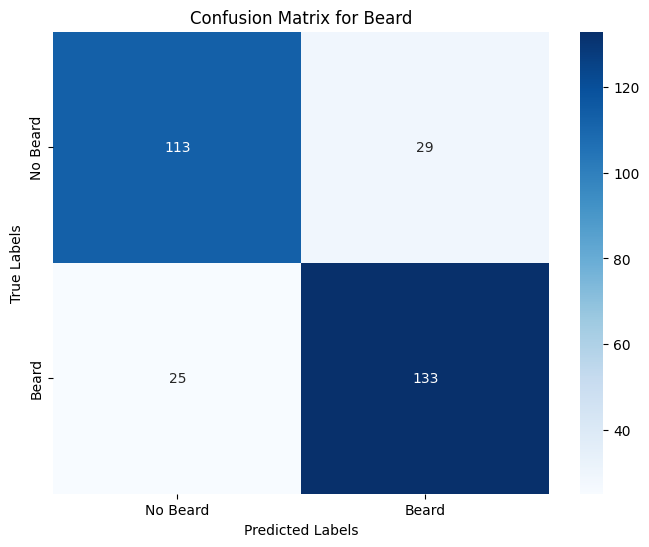

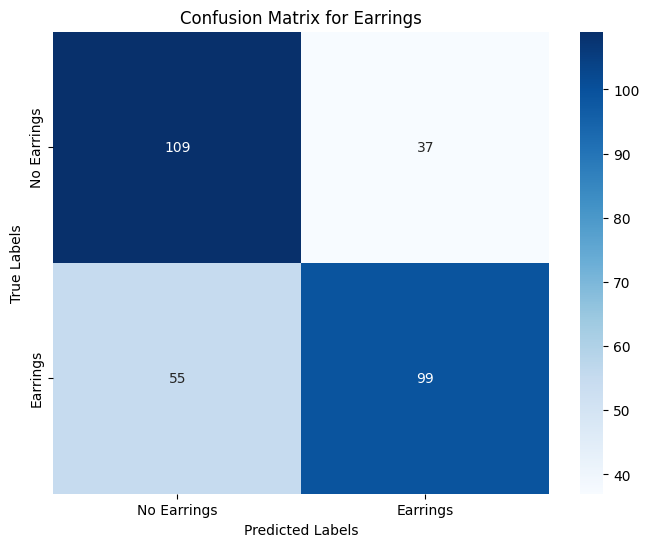

Classification Report for Beard:

              precision    recall  f1-score   support

    No Beard       0.82      0.80      0.81       142
       Beard       0.82      0.84      0.83       158

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

Classification Report for Earrings:

              precision    recall  f1-score   support

 No Earrings       0.66      0.75      0.70       146
    Earrings       0.73      0.64      0.68       154

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300

Overall F1 Score: 0.55
Overall Precision: 0.56
Overall Recall: 0.55


/Users/adirserruya/Projects/ProjectsVenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adirserruya/Projects/ProjectsVenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adirserruya/Projects/ProjectsVenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

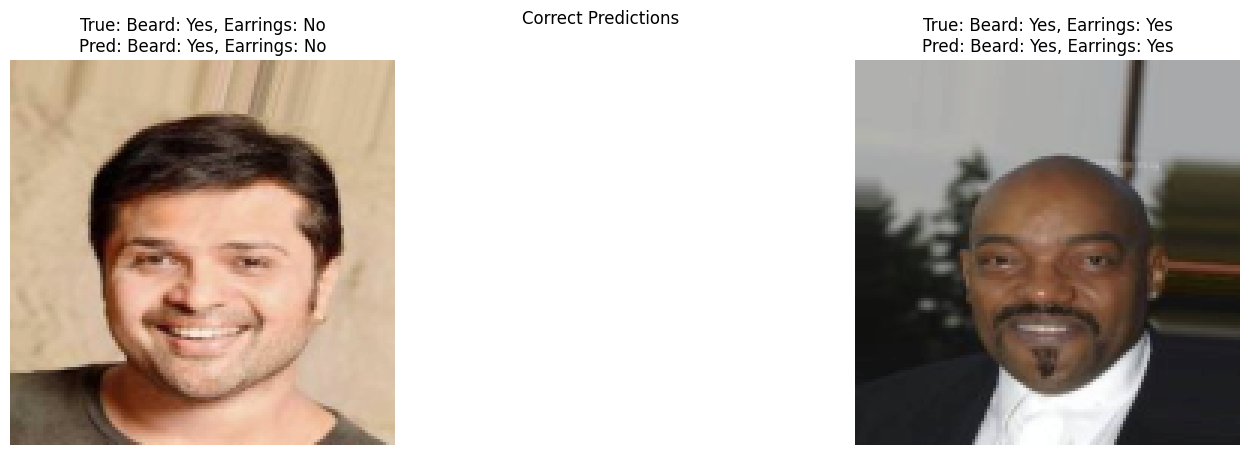

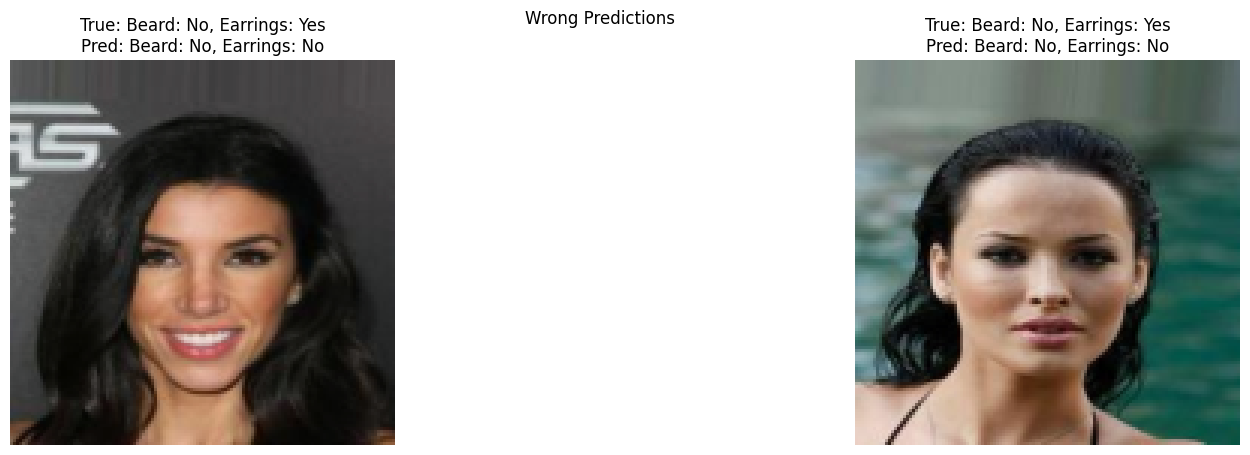

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Switch to evaluation mode
model.eval()

# Collect predictions and true labels
all_preds = []
all_labels = []
all_images = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        # Apply sigmoid and threshold at 0.5 for multi-label classification
        preds = torch.sigmoid(outputs) > 0.5
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu())  # Save images for visualization

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute confusion matrices for each label
conf_matrix_beard = confusion_matrix(all_labels[:, 0], all_preds[:, 0])
conf_matrix_earring = confusion_matrix(all_labels[:, 1], all_preds[:, 1])

# Plot confusion matrix for Beard
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_beard, annot=True, fmt="d", cmap="Blues", xticklabels=["No Beard", "Beard"],
            yticklabels=["No Beard", "Beard"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Beard")
plt.show()

# Plot confusion matrix for Earrings
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_earring, annot=True, fmt="d", cmap="Blues", xticklabels=["No Earrings", "Earrings"],
            yticklabels=["No Earrings", "Earrings"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Earrings")
plt.show()

# Generate classification reports for each label
print("Classification Report for Beard:\n")
print(classification_report(all_labels[:, 0], all_preds[:, 0], target_names=["No Beard", "Beard"]))
print("Classification Report for Earrings:\n")
print(classification_report(all_labels[:, 1], all_preds[:, 1], target_names=["No Earrings", "Earrings"]))

# Calculate overall F1 score, precision, and recall for all labels
f1 = f1_score(all_labels, all_preds, average='samples')
precision = precision_score(all_labels, all_preds, average='samples')
recall = recall_score(all_labels, all_preds, average='samples')
print(f"Overall F1 Score: {f1:.2f}")
print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")

# Find indices of correct and incorrect predictions for each label
correct_indices = np.where((all_preds == all_labels).all(axis=1))[0]
incorrect_indices = np.where((all_preds != all_labels).any(axis=1))[0]

# Select 2 correct and 2 wrong examples randomly
rand = np.random.choice(len(correct_indices), 2, replace=False)
correct_samples = correct_indices[rand]
rand = np.random.choice(len(incorrect_indices), 2, replace=False)
incorrect_samples = incorrect_indices[rand]


# Helper function to visualize images
def show_samples(indices, title):
    plt.figure(figsize=(20, 5))
    for i, idx in enumerate(indices):
        img = all_images[idx].numpy().transpose((1, 2, 0))  # Convert to HWC format
        mean = np.array([0.485, 0.456, 0.406])  # Mean used during normalization
        std = np.array([0.229, 0.224, 0.225])   # Std deviation used during normalization
        img = std * img + mean  # Denormalize the image
        img = np.clip(img, 0, 1)  # Clip to valid range [0, 1]

        plt.subplot(1, 2, i + 1)
        label = all_labels[idx]
        pred = all_preds[idx]
        label_str = f"Beard: {'Yes' if label[0] == 1 else 'No'}, Earrings: {'Yes' if label[1] == 1 else 'No'}"
        pred_str = f"Beard: {'Yes' if pred[0] == 1 else 'No'}, Earrings: {'Yes' if pred[1] == 1 else 'No'}"
        plt.imshow(img)
        plt.title(f"True: {label_str}\nPred: {pred_str}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Display correct predictions
show_samples(correct_samples, title="Correct Predictions")

# Display wrong predictions
show_samples(incorrect_samples, title="Wrong Predictions")


# Playing Around

In [2]:
from transformers import pipeline
from PIL import Image

# Load the image using PIL
img_path = r'/Users/adirserruya/Projects/BigDataMining/Lecture9/no_beard_no_earing.jpeg'  # Replace with your image path
image = Image.open(img_path)

# Initialize the VQA pipeline
vqa_pipeline = pipeline("visual-question-answering")

# Questions for the classifier
question_beard = "Does the person have a beard?"
question_earring = "Is the person wearing earrings?"



No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Beard Detection: no (Confidence: 1.00)
Earring Detection: no (Confidence: 0.78)


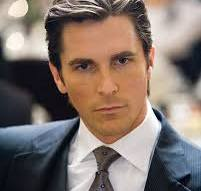

Beard Detection: no (Confidence: 1.00)
Earring Detection: no (Confidence: 0.78)


In [5]:
# Get predictions
response_beard = vqa_pipeline(image, question_beard, top_k=1)
response_earring = vqa_pipeline(image, question_earring, top_k=1)

# Show image in cell
display(image)
# Print results
print(f"Beard Detection: {response_beard[0]['answer']} (Confidence: {response_beard[0]['score']:.2f})")
print(f"Earring Detection: {response_earring[0]['answer']} (Confidence: {response_earring[0]['score']:.2f})")


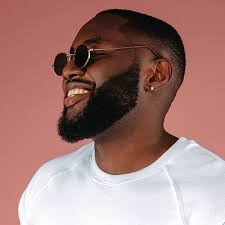

Beard Detection: yes (Confidence: 1.00)
Earring Detection: yes (Confidence: 0.94)


In [6]:
# Get predictions
image_path = r"/Users/adirserruya/Projects/BigDataMining/Lecture9/beard_and_earing.jpeg"
image = Image.open(image_path)
response_beard = vqa_pipeline(image, question_beard, top_k=1)
response_earring = vqa_pipeline(image, question_earring, top_k=1)

# Show image in cell
display(image)
# Print results
print(f"Beard Detection: {response_beard[0]['answer']} (Confidence: {response_beard[0]['score']:.2f})")
print(f"Earring Detection: {response_earring[0]['answer']} (Confidence: {response_earring[0]['score']:.2f})")
